# Experiment description
Background: current training SEPP model (TRAINING_BOGOTA_SEPP) have thrown three errors for most cases (most localidades):
- Small variance
- No standard deviation
- Few trigger points generated for KDE

Considering default parameters are preserved, time window seems to be the only 'free' parameter to tune up.

Goal: Find a suitable (without errors) time window to train SEPP model by localidades

## Method: 

- Train SEPP model for a localidades set (e.g. localidades with high predictability index):
    - Use data of 7 days to train model (ok).
    - Use data of 15 days to train model (fail).
    - Use data of a month to train model (fail).
    - Use data of three months to train model (fail).

## Conclusions:
- trainModel_1 vs. trainModel_2: set additional parameters such as time_cutoff and space_cutoff don't seem to have a positive effect on training model performance (errors still emerge for long time windows and processing is even slower)
- For time windows bigger than one week wasn't possible to train any model. Variance and std deviation errors always emerged.
- One week training time window worked for all high predictability localidades subset. Seems variance and std errors are related to the size of points per localidad (number of time stamps -> point process). Variance and std errors seems to emerged more frequently for len(subsets) > 800, and few triggering points error seems to emerged more frequently for len(subset) < 200
- One week training time window didn't work for ALL localidades. Seems a "dynamic" time window is required (to guarantee min and max data points tresholds)

In [1]:
%matplotlib inline
import pandas as pd
import pickle

In [2]:
import import_ipynb
import training_sepp_builtin

importing Jupyter notebook from training_sepp_builtin.ipynb
  Using cached https://github.com/QuantCrimAtLeeds/PredictCode/zipball/master
You are using pip version 18.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://github.com/MatthewDaws/SEPP/zipball/master
You are using pip version 18.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Failed to import `rtree`.
Failed to import `rtree`.


In [3]:
path = '/Users/anamaria/Desktop/dev/security_project'

In [4]:
df = pd.read_csv(path+'/datasets/verify_enrich_nuse_29112019.csv')

In [18]:
df.LOCALIDAD.unique()

array(['ANTONIO NARIÑO', 'ENGATIVA', 'KENNEDY', 'SUBA',
       'RAFAEL URIBE URIBE', 'SAN CRISTOBAL', 'BOSA', 'USAQUEN',
       'TEUSAQUILLO', 'CIUDAD BOLIVAR', 'FONTIBON', 'CANDELARIA', 'USME',
       'TUNJUELITO', 'PUENTE ARANDA', 'CHAPINERO', 'BARRIOS UNIDOS',
       'LOS MARTIRES', 'SANTA FE', 'SIN LOCALIZACION'], dtype=object)

In [19]:
higher_predictability_localidades = ['CIUDAD BOLIVAR', 'BOSA', 'USME', 'SAN CRISTOBAL', 'RAFAEL URIBE URIBE']
lower_predictability_localidades = ['TEUSAQUILLO', 'MARTIRES', 'BARRIOS UNIDOS', 'CANDELARIA', 'CHAPINERO']

## Training model_1 for localidades

### One week time window

In [15]:
initial_date = '2017-01-01'
final_date = '2017-01-07'
train_time_window = '_'+initial_date+'_to_'+final_date

CIUDAD BOLIVAR
TimeStamps
<class 'pandas.core.series.Series'>
[170      2017-01-01 04:10:00
181      2017-01-01 01:03:00
214      2017-01-01 18:32:00
215      2017-01-01 19:11:00
218      2017-01-01 08:31:00
                 ...        
699411   2017-01-06 13:28:00
699420   2017-01-06 14:18:00
699423   2017-01-06 16:31:00
699432   2017-01-06 18:35:00
699435   2017-01-06 12:07:00
Name: FECHA_HORA_TS, Length: 732, dtype: datetime64[ns]]
BOSA
TimeStamps
<class 'pandas.core.series.Series'>
[168      2017-01-01 06:54:00
174      2017-01-01 12:05:00
186      2017-01-01 05:26:00
193      2017-01-01 04:55:00
204      2017-01-01 03:44:00
                 ...        
699391   2017-01-06 21:56:00
699396   2017-01-06 17:17:00
699417   2017-01-06 13:58:00
699441   2017-01-06 23:04:00
699447   2017-01-06 18:26:00
Name: FECHA_HORA_TS, Length: 660, dtype: datetime64[ns]]
0 standard deviation: [2152.89714406    0.            0.        ]
USME
TimeStamps
<class 'pandas.core.series.Series'>
[199      2017

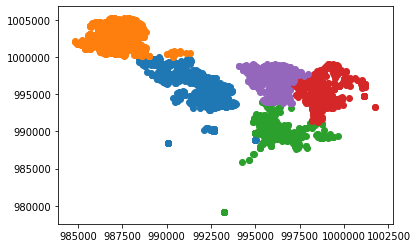

In [20]:
for localidad in higher_predictability_localidades:
    print(localidad)
    localidad_predictor = training_sepp_builtin.trainModel_1(df, localidad, initial_date, final_date)
    localidad_outfile = open(path+'/aggressive_behavior_model/SEPP/'+'pkl/TrainRina_'+str(localidad)+train_time_window+'.pkl','wb')
    pickle.dump(localidad_predictor, localidad_outfile)
    localidad_outfile.close() 

### Half month time window

In [13]:
initial_date = '2017-01-01'
final_date = '2017-01-15'
train_time_window = '_'+initial_date+'_to_'+final_date

CIUDAD BOLIVAR
TimeStamps
<class 'pandas.core.series.Series'>
[170      2017-01-01 04:10:00
181      2017-01-01 01:03:00
214      2017-01-01 18:32:00
215      2017-01-01 19:11:00
218      2017-01-01 08:31:00
                 ...        
700070   2017-01-14 01:37:00
700088   2017-01-14 00:47:00
700131   2017-01-14 09:44:00
700144   2017-01-14 16:51:00
700158   2017-01-14 12:40:00
Name: FECHA_HORA_TS, Length: 1415, dtype: datetime64[ns]]
0 standard deviation: [4772.56315988    0.            0.        ]
Too small variance!
0 standard deviation: [4752.52372097    0.            0.        ]
0 standard deviation: [4780.50766345    0.            0.        ]
0 standard deviation: [4770.60910992    0.            0.        ]
0 standard deviation: [4799.09452571    0.            0.        ]


KeyboardInterrupt: 

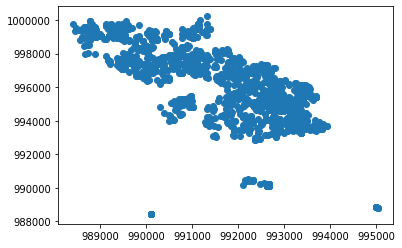

In [14]:
for localidad in higher_predictability_localidades:
    print(localidad)
    localidad_predictor = training_sepp_builtin.trainModel_1(df, localidad, initial_date, final_date)
    localidad_outfile = open(path+'/aggressive_behavior_model/SEPP/'+'pkl/TrainRina_'+str(localidad)+train_time_window+'.pkl','wb')
    pickle.dump(localidad_predictor, localidad_outfile)
    localidad_outfile.close() 

### One month time window

In [6]:
initial_date = '2017-01-01'
final_date = '2017-01-31'
train_time_window = '_'+initial_date+'_to_'+final_date

CIUDAD BOLIVAR


training_sepp_builtin.ipynb:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  {
training_sepp_builtin.ipynb:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  {
training_sepp_builtin.ipynb:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "output_type": "stream",


TimeStamps
<class 'pandas.core.series.Series'>
[170      2017-01-01 04:10:00
181      2017-01-01 01:03:00
214      2017-01-01 18:32:00
215      2017-01-01 19:11:00
218      2017-01-01 08:31:00
                 ...        
701718   2017-01-30 10:47:00
701747   2017-01-30 16:36:00
701752   2017-01-30 22:35:00
701759   2017-01-30 19:01:00
701771   2017-01-30 21:14:00
Name: FECHA_HORA_TS, Length: 2847, dtype: datetime64[ns]]
0 standard deviation: [5406.31734873    0.            0.        ]
Too small variance!
Too small variance!
0 standard deviation: [8486.38711823    0.            0.        ]
0 standard deviation: [8419.88107288    0.            0.        ]
Too small variance!
Too small variance!
Too small variance!
0 standard deviation: [7320.47651403    0.            0.        ]
0 standard deviation: [7995.19669568    0.            0.        ]
0 standard deviation: [4708.70636817    0.            0.        ]
Too small variance!
Too small variance!
Too small variance!
Too small variance!

KeyboardInterrupt: 

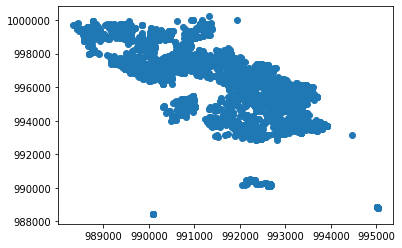

In [7]:
for localidad in higher_predictability_localidades:
    print(localidad)
    localidad_predictor = training_sepp_builtin.trainModel_1(df, localidad, initial_date, final_date)
    localidad_outfile = open(path+'/aggressive_behavior_model/SEPP/'+'pkl/TrainRina_'+str(localidad)+train_time_window+'.pkl','wb')
    pickle.dump(localidad_predictor, localidad_outfile)
    localidad_outfile.close() 

### Three months time window

In [9]:
initial_date = '2017-01-01'
final_date = '2017-03-31'
train_time_window = '_'+initial_date+'_to_'+final_date

CIUDAD BOLIVAR
TimeStamps
<class 'pandas.core.series.Series'>
[157      2017-03-07 05:43:00
162      2017-03-21 06:14:00
170      2017-01-01 04:10:00
181      2017-01-01 01:03:00
214      2017-01-01 18:32:00
                 ...        
708402   2017-03-30 07:53:00
708407   2017-03-30 21:06:00
708417   2017-03-30 19:37:00
708419   2017-03-30 19:30:00
708420   2017-03-30 17:52:00
Name: FECHA_HORA_TS, Length: 8539, dtype: datetime64[ns]]
Too small variance!
Too small variance!


KeyboardInterrupt: 

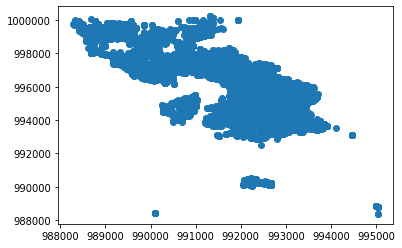

In [10]:
for localidad in higher_predictability_localidades:
    print(localidad)
    localidad_predictor = training_sepp_builtin.trainModel_1(df, localidad, initial_date, final_date)
    localidad_outfile = open(path+'/aggressive_behavior_model/SEPP/'+'pkl/TrainRina_'+str(localidad)+train_time_window+'.pkl','wb')
    pickle.dump(localidad_predictor, localidad_outfile)
    localidad_outfile.close() 

## Training model_2 for localidades

### Half month time window

In [6]:
initial_date = '2017-01-01'
final_date = '2017-01-15'
train_time_window = '_'+initial_date+'_to_'+final_date

CIUDAD BOLIVAR


training_sepp_builtin.ipynb:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  {
training_sepp_builtin.ipynb:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  {
training_sepp_builtin.ipynb:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "output_type": "stream",


TimeStamps
<class 'pandas.core.series.Series'>
[170      2017-01-01 04:10:00
181      2017-01-01 01:03:00
214      2017-01-01 18:32:00
215      2017-01-01 19:11:00
218      2017-01-01 08:31:00
                 ...        
700070   2017-01-14 01:37:00
700088   2017-01-14 00:47:00
700131   2017-01-14 09:44:00
700144   2017-01-14 16:51:00
700158   2017-01-14 12:40:00
Name: FECHA_HORA_TS, Length: 1415, dtype: datetime64[ns]]
0 standard deviation: [4775.46132102    0.            0.        ]
0 standard deviation: [4780.84511103    0.            0.        ]
Too small variance!
0 standard deviation: [4795.9110864    0.           0.       ]
0 standard deviation: [4753.04036489    0.            0.        ]
0 standard deviation: [4762.99336859    0.            0.        ]
0 standard deviation: [4770.01583753    0.            0.        ]
0 standard deviation: [4724.86450479    0.            0.        ]


KeyboardInterrupt: 

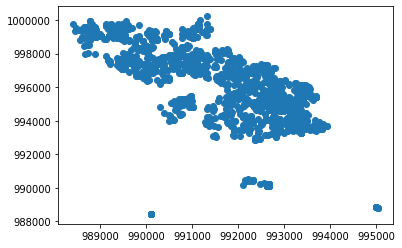

In [7]:
for localidad in higher_predictability_localidades:
    print(localidad)
    localidad_predictor = training_sepp_builtin.trainModel_2(df, localidad, initial_date, final_date)
    localidad_outfile = open(path+'/aggressive_behavior_model/SEPP/'+'pkl/TrainRina_'+str(localidad)+train_time_window+'.pkl','wb')
    pickle.dump(localidad_predictor, localidad_outfile)
    localidad_outfile.close() 

### Month time window

In [8]:
initial_date = '2017-01-01'
final_date = '2017-01-31'
train_time_window = '_'+initial_date+'_to_'+final_date

CIUDAD BOLIVAR
TimeStamps
<class 'pandas.core.series.Series'>
[170      2017-01-01 04:10:00
181      2017-01-01 01:03:00
214      2017-01-01 18:32:00
215      2017-01-01 19:11:00
218      2017-01-01 08:31:00
                 ...        
701718   2017-01-30 10:47:00
701747   2017-01-30 16:36:00
701752   2017-01-30 22:35:00
701759   2017-01-30 19:01:00
701771   2017-01-30 21:14:00
Name: FECHA_HORA_TS, Length: 2847, dtype: datetime64[ns]]
Too small variance!
0 standard deviation: [6611.80847382    0.            0.        ]


KeyboardInterrupt: 

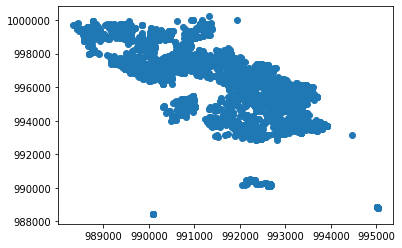

In [9]:
for localidad in higher_predictability_localidades:
    print(localidad)
    localidad_predictor = training_sepp_builtin.trainModel_2(df, localidad, initial_date, final_date)
    localidad_outfile = open(path+'/aggressive_behavior_model/SEPP/'+'pkl/TrainRina_'+str(localidad)+train_time_window+'.pkl','wb')
    pickle.dump(localidad_predictor, localidad_outfile)
    localidad_outfile.close() 

## Test training model_1 for ALL localidades

### One week time window: fail (i.e. Antonio Nariño and Teusaquillo very few points < 100)

In [ ]:
localidades_list = list(df.LOCALIDAD.unique())
localidades_list.remove('SIN LOCALIZACION')

In [28]:
initial_date = '2017-01-01'
final_date = '2017-01-05'
train_time_window = '_'+initial_date+'_to_'+final_date

In [ ]:
for localidad in localidades_list[1:]:
    print(localidad)
    localidad_predictor = training_sepp_builtin.trainModel_1(df, localidad, initial_date, final_date)
    localidad_outfile = open(path+'/aggressive_behavior_model/SEPP/'+'pkl/TrainRina_'+str(localidad)+train_time_window+'.pkl','wb')
    pickle.dump(localidad_predictor, localidad_outfile)
    localidad_outfile.close() 